<img src="images/Saguaro map.png">

## How Weather Affects The Health of The Saguaro Population at Desert Botanical Garden

### A short video introduction to the subjects of our analysis

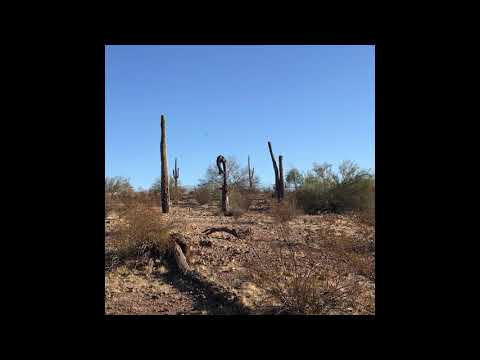

In [22]:
from IPython.display import YouTubeVideo
id = "o8hBhOgSMfo"
YouTubeVideo(id = id)

## Thank you
* To the Research Team at Desert Botanical Garden - staff and volunteers - for the time and energy you have invested in creating this invaluable dataset and for supporting our class project.

## Data analysis team
* Steve Ovsak researched historical weather data sources, obtained and formatted the weather data for analysis, and carried out weather data exploration.
* Steven Rohano's background is in the agricultural industry. He cleaned up and structured the historical saguaro inventory dataset for analysis and debugged the analysis notebook.
* Michael Fahey debugged jupyter notebooks and hosted the GitHub repo.
* Veronica Nixon was responsible for organizing the Saguaro Inventory from 2012 to 2020 as the Garden's GIS Manager. She continues to support the Garden as a volunteer. Her background is in geographic information systems and science and she contributed botanical information to this analysis as well as data prep, analysis, and general project management.

## Introduction
* Desert Botanical Garden (DBG) has conducted an annual Saguaro Inventory since 2012. Every year 20+ volunteers and staff visit each saguaro on the property to assess its condition. Height measurements are taken every 5 years. We obtained the full historical saguaro inventory dataset from DBG and performed basic statistical analyses to look for any patterns or trends in the data. We obtained a daily historical weather dataset and focused this analysis on the affect on weather on the health of the DBG saguaro population.

## Research questions
* Phoenix weather made the news a lot this summer and record temperatures have the community worried about a possible threat to our saguaro plantings around Phoenix and our iconic saguaro forests in surrounding desert areas.
https://www.washingtonpost.com/weather/2020/07/30/phoenix-hottest-month-july/
https://www.azcentral.com/story/news/local/arizona-environment/2020/06/18/saguaro-cactus-imperiled-climate-change-and-humans/3000183001/
* To begin to explore the relationship between weather and saguaro health, we focused on night-time lows and precipitation.
* Is there a relationship between saguaro mortality and the number of nights above 90 degrees in a year? Cacti cannot "breathe" when the night-time temperature stays above 90, so we would expect to see higher mortality in years with more nights above 90.
* Is there a relationship between saguaro growth rate and precipitation? We would expect to see higher growth rates in the year(s) following a high precipitation year.

## Data
* Historical Saguaro Inventory records were provided by Desert Botanical Garden from https://www.livingcollections.org.
* Weather data was purchased from Visual Crossing: https://www.visualcrossing.com/weather/weather-data-services#/login
* Saguaro and weather datasets were cleaned up and reformated using pandas.
* Mortality_per_year_ready_for_analysis.csv contains the count of how many saguaros were lost in each year of interest.
* GrowthRates_ready_for_analysis.csv contains average annual growth rates for each timespan of interest.
* Nights_above_90_ready_for_analysis.csv contains the count of how many days had a low >= 90 F for each year.
* precip_ready_for_analysis.csv contains average precipitation for each timespan of interest.

## Analysis of saguaro mortality patterns

### 1-year offset between weather year and mortality year
* Bar plot of saguaro losses each year
* Bar plot of nights above 90 earch year
* Regression analysis of saguaro losses versus nights above 90

### 2-year offset between weather year and mortality year
* Bar plot of saguaro losses each year
* Bar plot of nights above 90 earch year
* Regression analysis of saguaro losses versus nights above 90

## Analysis of saguaro growth rate patterns
* Bar plot of saguaro growth rate per timespan
* Bar plot of average annual precipitation per timespan
* Scatter plot of saguaro growth rate versus average annual precipitation

## Conclusions and Future Work
* After performing a linear regression analysis on saguaro mortality versus nights above 90, we found no significant correlation between either saguaro mortality rate and nights above 90 in the previous year or between saguaro mortality and nights above 90 two years prior. We are surprised by the lack of correlation given the number of saguaros lost in the Phoenix community this summer (with 23 nights above 90 F) and given the known physiological impact of nighttime lows on cactus health. We plan to review the inventory data to check that all saguaro deaths were recorded in the year they occurred. If no errors are found, perhaps the 90-degree threshhold isn't as important as we had assumed or the number of nights in a year above that threshhold is not a useful metric. We could, for example, count the number of consecutive nights and modify the temperature threshhold.

* 525 saguaros were measured in 2013, 2015, and 2020, giving us the opportunity to analyze their growth rates in two time periods and compare their growth rates to the average precipitation for those time periods. The scatterplot of growth rate versus precipitation revealed the opposite of what we were expecting, an increase in growth rate with decreased precipitation. But given that the growth rate versus precipitation trend is only based on 2 timepoints, we need to wait for more years of data to be collected before the trend can be analyzed statistically. Hopefully, technological advancements will allow for yearly measurements in the near future.

* It is very interesting to see (in the final bar chart) that the saguaros grew more than twice as fast during timespan 2 (2015-2020) as compared to timespan 1 (2012-2015). This may be partially due to weather factors we haven't considered in our analysis. However, it is certainly due in part to the saguaros simply being older in timespan 2. The average height of the saguaros tracked for this analysis was 11.0 ft in 2013, 11.7 ft in 2015, and 13.1 ft in 2020. While the DBG saguaro population ranges in height from 1 inch to 30 feet, it is informative to use the average height as a representation of the growth of the population. Saguaro growth rate is known to increase until a saguaro grows its first arm (https://www.nps.gov/sagu/learn/nature/how-saguaros-grow.htm), so we would expect growth rate to accelerate for a saguaros of this age. The saguaros tracked across the two timespans are, on average, accelerating in their growth and this might explain why the growth rate in timespan 2 is larger than in timespan 1 despite the substantial drop in rainfall. Future work might be able to tease out the effect of weather on growth rate by subtracting out the expected growth rate for saguaros of these three heights that has been established in studies of other saguaro populations.

* Due to the difficulty of measuring saguaro heights, they can only be measured every 5 years. Therefore for this analysis we only had access to two growth rate datapoints. As time passes and more data is collected, it will be interesting to run regression analyses on growth rate-related trends.

* Future work will (hopefully) include Saguaro Inventory 2021 in February!

In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts

In [2]:
# Import data
mortality_per_year_df = pd.read_csv("../Data ready for analyses/Mortality_per_year_ready_for_analysis.csv")
height_measurements_2013_2015_2020_df = pd.read_csv("../Data ready for analyses/Measurements_2013_2015_2020.csv")
growth_rates_df = pd.read_csv("../Data ready for analyses/GrowthRates_ready_for_analysis.csv")
nights_above_90_df = pd.read_csv("../Data ready for analyses/Nights_above_90_ready_for_analysis.csv")
precip_df = pd.read_csv("../Data ready for analyses/precip_ready_for_analysis.csv")

# Analyze Saguaro Mortality Trends

In [41]:
# Drop first column
nights_above_90_df = nights_above_90_df[["Year", "Nights Above 90"]]
nights_above_90_df

,Year,Nights Above 90
0,2012,8
1,2013,13
2,2014,4
3,2015,7
4,2016,6
5,2017,7
6,2018,11
7,2019,10
8,2020,23


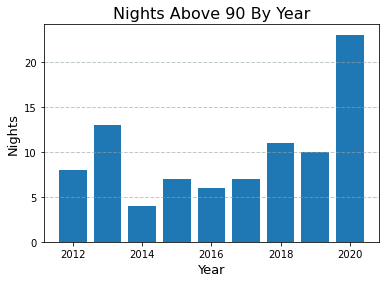

In [42]:
# Bar plot of nights above 90 by year (2012-2020).
plt.bar(nights_above_90_df["Year"], nights_above_90_df["Nights Above 90"])
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.6)
plt.title("Nights Above 90 By Year", fontsize = 16)
plt.xlabel("Year", fontsize = 13)
plt.ylabel("Nights", fontsize = 13)
plt.yticks(np.arange(0, 25, step=5))
plt.savefig("../Results/Nights_above_90_per_year")
plt.show()

In [43]:
# View dataset
mortality_per_year_df

,Unnamed: 0,Year,Mortality Count
0,0,2014,5
1,1,2015,20
2,2,2016,8
3,3,2017,19
4,4,2018,13
5,5,2019,17
6,6,2020,14


In [44]:
# Drop first column
mortality_per_year_df = mortality_per_year_df[["Year", "Mortality Count"]]
mortality_per_year_df

,Year,Mortality Count
0,2014,5
1,2015,20
2,2016,8
3,2017,19
4,2018,13
5,2019,17
6,2020,14


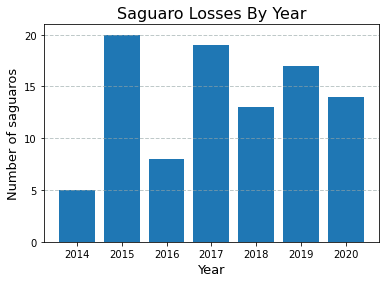

In [45]:
# Bar plot of saguaros losses by year.
plt.bar(mortality_per_year_df["Year"], mortality_per_year_df["Mortality Count"])
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.6)
plt.title("Saguaro Losses By Year", fontsize = 16)
plt.xlabel("Year", fontsize = 13)
plt.ylabel("Number of saguaros", fontsize = 13)
plt.yticks(np.arange(0, 25, step=5))
plt.savefig("../Results/Losses_per_year")
plt.show()

### Visualize 1-year lag between night above 90 and saguaro mortality

In [46]:
nights_above_90_1_df = nights_above_90_df.loc[(nights_above_90_df["Year"] >= 2013) & (nights_above_90_df["Year"] <= 2019)].copy()
nights_above_90_1_df

,Year,Nights Above 90
1,2013,13
2,2014,4
3,2015,7
4,2016,6
5,2017,7
6,2018,11
7,2019,10


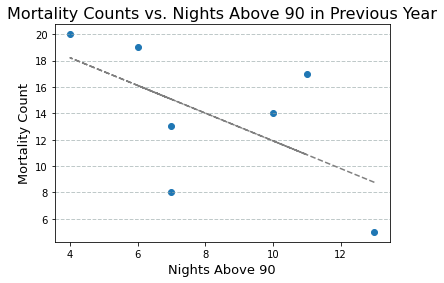

y=-1.1*x+22.4
r=-0.59
p=0.1618


In [47]:
# Linear regression analysis of mean annual mortality rate vs. number of nights above 90

# Scatter plot
x_axis = nights_above_90_1_df["Nights Above 90"]
y_axis = mortality_per_year_df["Mortality Count"]
plt.scatter(x_axis, y_axis)
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.6)
plt.title("Mortality Counts vs. Nights Above 90 in Previous Year", fontsize = 16)
plt.xlabel("Nights Above 90", fontsize = 13)
plt.ylabel("Mortality Count", fontsize = 13)

# Linear regression analysis
slope, y_int, r, p, std_err = sts.linregress(nights_above_90_1_df["Nights Above 90"], mortality_per_year_df["Mortality Count"])
predicted_temp = slope * nights_above_90_1_df["Nights Above 90"] + y_int
plt.plot(nights_above_90_1_df["Nights Above 90"], predicted_temp,"--", c="gray")
plt.savefig("../Results/Losses vs Nights Above 90")
plt.show()

# Print statistics
print("y=" + str(round(slope, 1)) + "*x+" + str(round(y_int, 1)))
print("r=" + str(round(r, 2)))
print("p=" + str(round(p, 4)))

### Visualize 2-year lag between nights above 90 and saguaro mortality

In [48]:
nights_above_90_2_df = nights_above_90_df.loc[(nights_above_90_df["Year"] >= 2012) & (nights_above_90_df["Year"] <= 2018)].copy()
nights_above_90_2_df

,Year,Nights Above 90
0,2012,8
1,2013,13
2,2014,4
3,2015,7
4,2016,6
5,2017,7
6,2018,11


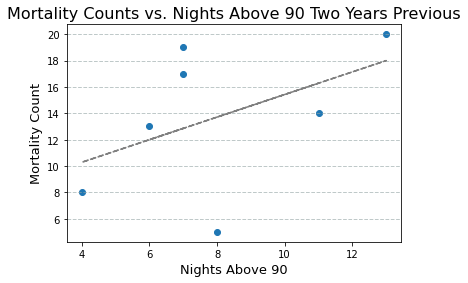

y=0.9*x+6.9
r=0.47
p=0.289


In [49]:
# Linear regression analysis of mean annual mortality rate vs. number of nights above 90

# Scatter plot
x_axis = nights_above_90_2_df["Nights Above 90"]
y_axis = mortality_per_year_df["Mortality Count"]
plt.scatter(x_axis, y_axis)
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.6)
plt.title("Mortality Counts vs. Nights Above 90 Two Years Previous", fontsize = 16)
plt.xlabel("Nights Above 90", fontsize = 13)
plt.ylabel("Mortality Count", fontsize = 13)

# Linear regression analysis
slope, y_int, r, p, std_err = sts.linregress(nights_above_90_2_df["Nights Above 90"], mortality_per_year_df["Mortality Count"])
predicted_temp = slope * nights_above_90_2_df["Nights Above 90"] + y_int
plt.plot(nights_above_90_2_df["Nights Above 90"], predicted_temp,"--", c="gray")
plt.savefig("../Results/Losses vs Nights Above 90")
plt.show()

# Print statistics
print("y=" + str(round(slope, 1)) + "*x+" + str(round(y_int, 1)))
print("r=" + str(round(r, 2)))
print("p=" + str(round(p, 4)))

# Analyze Saguaro Growth Rate Trends

In [3]:
# View saguaro height measurements

height_measurements_2013_2015_2020_df

,Unnamed: 0,Saguaro ID,2013 Measurement,2015 Measurement,2020 Measurement
0,2,1970-1021-01-1,19.9,21.50,22.3
1,3,1970-9909-01-1,23.7,24.95,25.1
2,4,1971-0130-01-1,6.1,6.90,8.6
3,6,1976-0079-01-1,16.8,16.90,17.5
4,7,1976-0235-01-1,13.7,14.00,14.7
...,...,...,...,...,...
520,955,2013-0266-01-4,17.8,17.80,18.3
521,956,2013-0266-01-5,5.0,5.00,5.9
522,957,2013-0266-01-6,4.8,5.50,7.2
523,958,2013-0266-01-7,5.7,5.70,6.3


In [11]:
# Explore the data

print("Found an outlier. Likely either a typo in the height or the wrong units were recorded.")
height_measurements_2013_2015_2020_df["2020 Measurement"].max()

Found an outlier. Likely either a typo in the height or the wrong units were recorded.


159.0

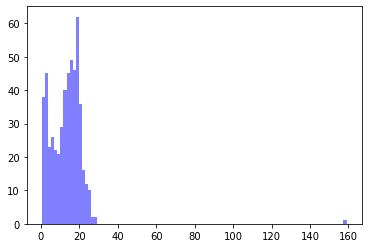

In [6]:
x = height_measurements_2013_2015_2020_df["2020 Measurement"]
num_bins = 100
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5)
plt.show()

In [ ]:
height_measurements_2013_2015_2020_df

plt.bar(height_measurements_2013_2015_2020_df["Year"], height_measurements_2013_2015_2020_df["Mortality Count"])
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.6)
plt.title("Saguaro Losses By Year", fontsize = 16)
plt.xlabel("Year", fontsize = 13)
plt.ylabel("Number of saguaros", fontsize = 13)
plt.yticks(np.arange(0, 25, step=5))
plt.savefig("../Results/Height_distribution_2020")
plt.show()

In [50]:
# Drop first column
precip_df = precip_df[["Timespan", "Mean Precipitation"]]
precip_df

,Timespan,Mean Precipitation
0,2013-2015,8.360
1,2015-2020,6.566


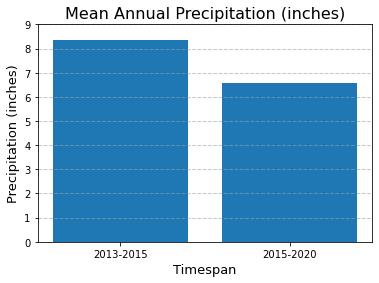

In [51]:
# Bar plot of average annual precipitation in each timespan.
plt.bar(precip_df["Timespan"], precip_df["Mean Precipitation"])
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.6)
plt.title("Mean Annual Precipitation (inches)", fontsize = 16)
plt.xlabel("Timespan", fontsize = 13)
plt.ylabel("Precipitation (inches)", fontsize = 13)
plt.yticks(np.arange(0, 10, step=1))
plt.savefig("../Results/Mean Annual Precipitation per Timespan")
plt.show()

In [52]:
# Drop first column
growth_rates_df = growth_rates_df[["Timespan", "Average Yearly Growth Rate"]]
growth_rates_df

,Timespan,Average Yearly Growth Rate
0,2013 - 2015,0.322
1,2015 - 2020,0.734


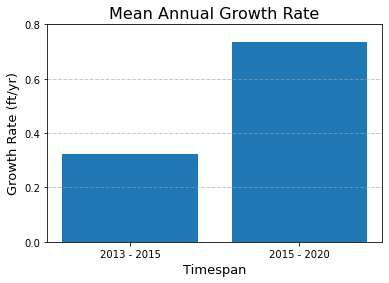

In [53]:
# Bar plot of average growth rate in each timespan.
plt.bar(growth_rates_df["Timespan"], growth_rates_df["Average Yearly Growth Rate"])
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.6)
plt.title("Mean Annual Growth Rate", fontsize = 16)
plt.xlabel("Timespan", fontsize = 13)
plt.ylabel("Growth Rate (ft/yr)", fontsize = 13)
plt.yticks(np.arange(0, 1, step=0.2))
plt.savefig("../Results/Mean Annual Growth per Timespan")
plt.show()

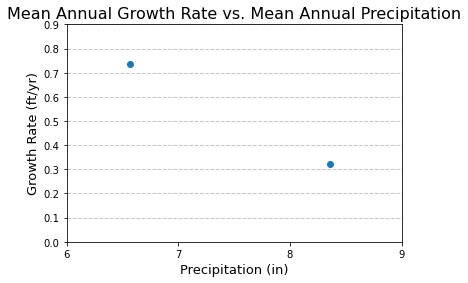

In [54]:
# Scatterplot of mean annual growth rate vs. mean annual precipitation (by timespan)
x_axis = precip_df["Mean Precipitation"]
y_axis = growth_rates_df["Average Yearly Growth Rate"]
plt.scatter(x_axis, y_axis)
plt.grid(color='#95a5a6', linestyle='--', linewidth=1, axis='y', alpha=0.6)
plt.title("Mean Annual Growth Rate vs. Mean Annual Precipitation", fontsize = 16)
plt.xlabel("Precipitation (in)", fontsize = 13)
plt.ylabel("Growth Rate (ft/yr)", fontsize = 13)
plt.yticks(np.arange(0, 1, step=.1))
plt.xticks(np.arange(6, 10, step = 1))
plt.savefig("../Results/Growth Rate vs Precipitation")
plt.show()